In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('encode_data.csv')

In [3]:
# Xem mô tả các cột số
print(df.describe())

       Diện tích (m²)  Mức giá (tỷ)  Số phòng ngủ    Số toilet  \
count     7892.000000   7892.000000   7892.000000  7892.000000   
mean        80.937278     11.629218      4.434997     4.153447   
std         52.556906     21.645048      5.474514     5.591002   
min          7.000000      0.600000      1.000000     1.000000   
25%         48.000000      3.900000      2.000000     2.000000   
50%         70.000000      5.900000      3.000000     3.000000   
75%         99.000000     11.500000      4.000000     4.000000   
max        961.000000    520.000000    105.000000   110.000000   

       Loại Nhà (mã hóa)  Quận (mã hóa)   Khoảng giá  Mức giá (triệu/m²)  
count        7892.000000    7892.000000  7892.000000         7892.000000  
mean            0.897364      10.506969     1.271414          138.585582  
std             0.935431       6.989071     0.581102          131.395490  
min             0.000000       0.000000     0.000000            7.361963  
25%             0.000000      

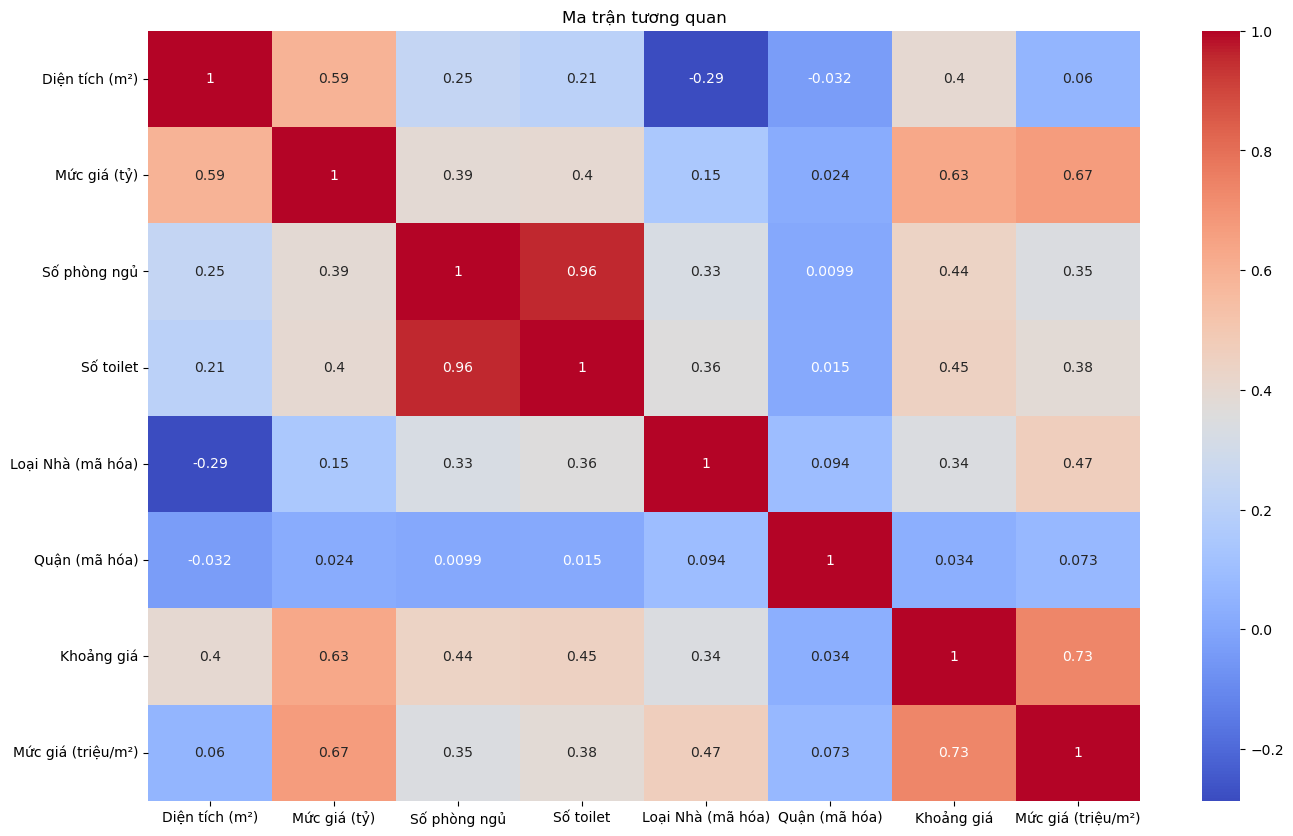

In [4]:
#Biểu đồ Heatmap cho ma trận tương quan:

plt.figure(figsize=(16, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

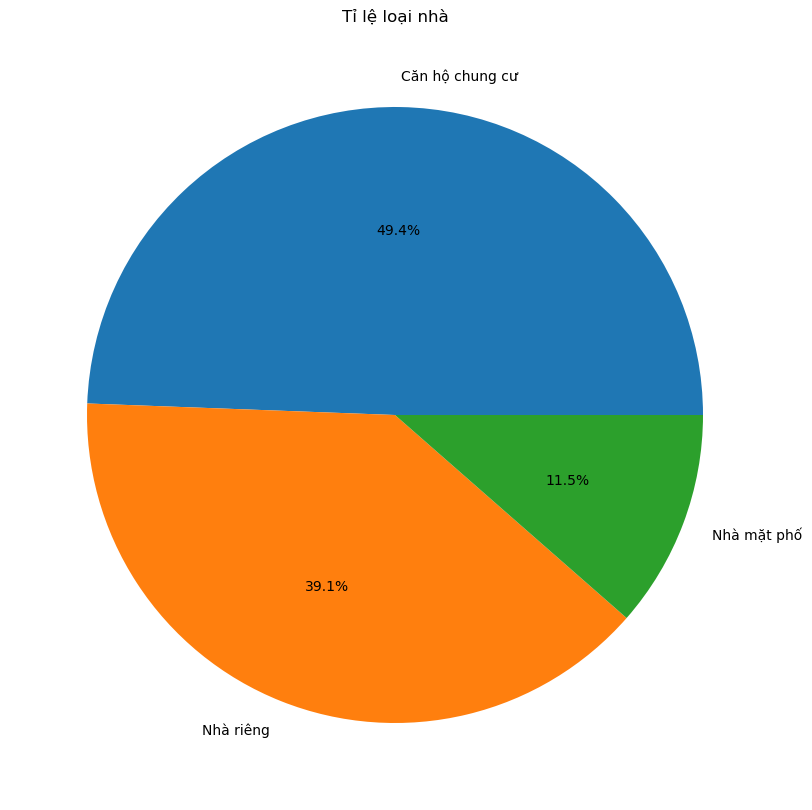

In [5]:
#Biểu đồ Pie Chart cho Tỉ lệ Loại nhà:

plt.figure(figsize=(10, 10))
df['Loại nhà'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỉ lệ loại nhà')
plt.ylabel('')
plt.show()

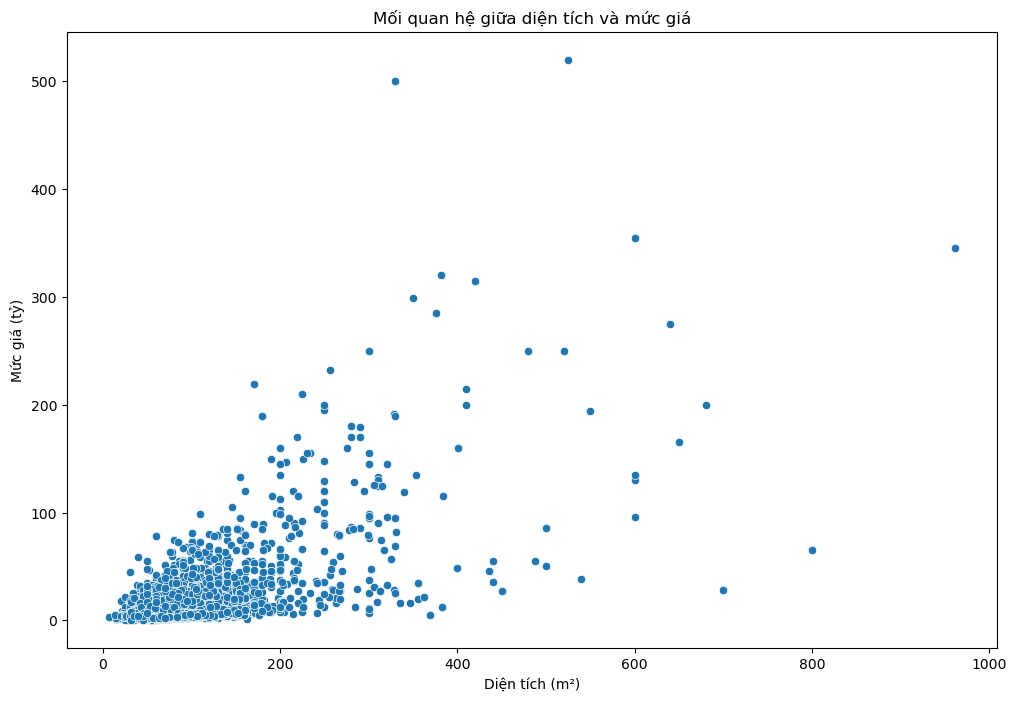

In [6]:
#Biểu đồ Scatter Plot cho Mức giá (tỷ) và Diện tích (m²):

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Diện tích (m²)', y='Mức giá (tỷ)')
plt.title('Mối quan hệ giữa diện tích và mức giá')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Mức giá (tỷ)')
plt.show()

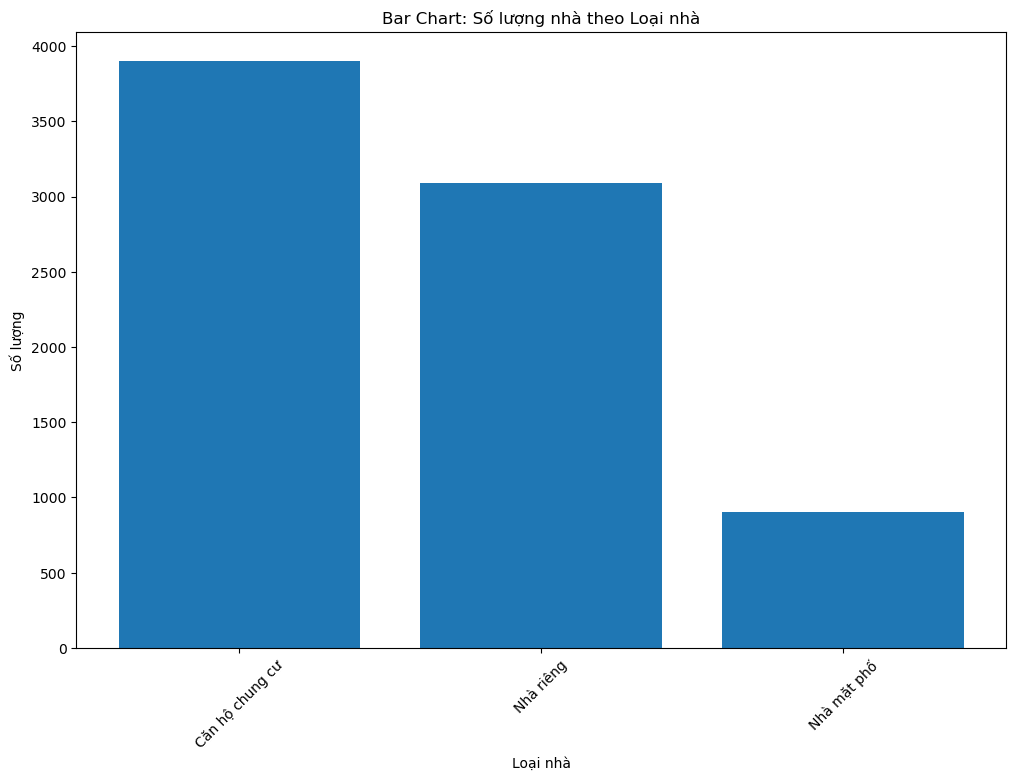

In [7]:
#Bar Chart: Số lượng nhà theo Loại nhà

counts = df['Loại nhà'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(counts.index, counts.values)
plt.xlabel('Loại nhà')
plt.ylabel('Số lượng')
plt.title('Bar Chart: Số lượng nhà theo Loại nhà')
plt.xticks(rotation=45)
plt.show()

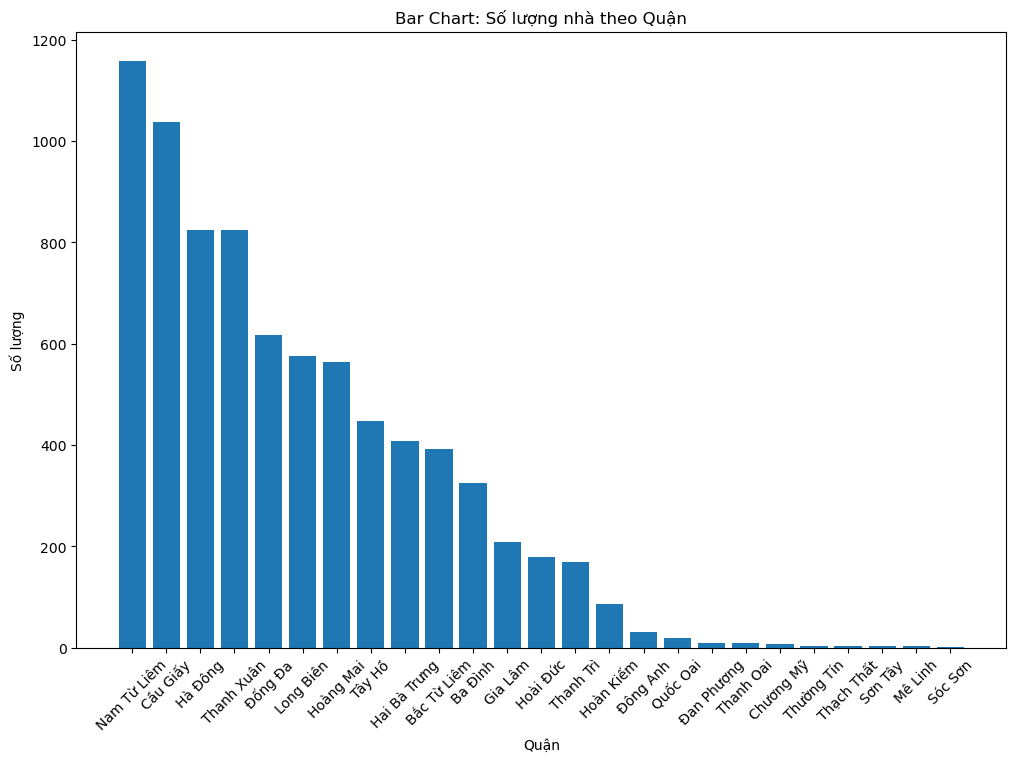

In [8]:
# Biểu đồ Bar Chart cho số lượng nhà theo Quận:
counts = df['Quận'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(counts.index, counts.values)
plt.xlabel('Quận')
plt.ylabel('Số lượng')
plt.title('Bar Chart: Số lượng nhà theo Quận')
plt.xticks(rotation=45)
plt.show()

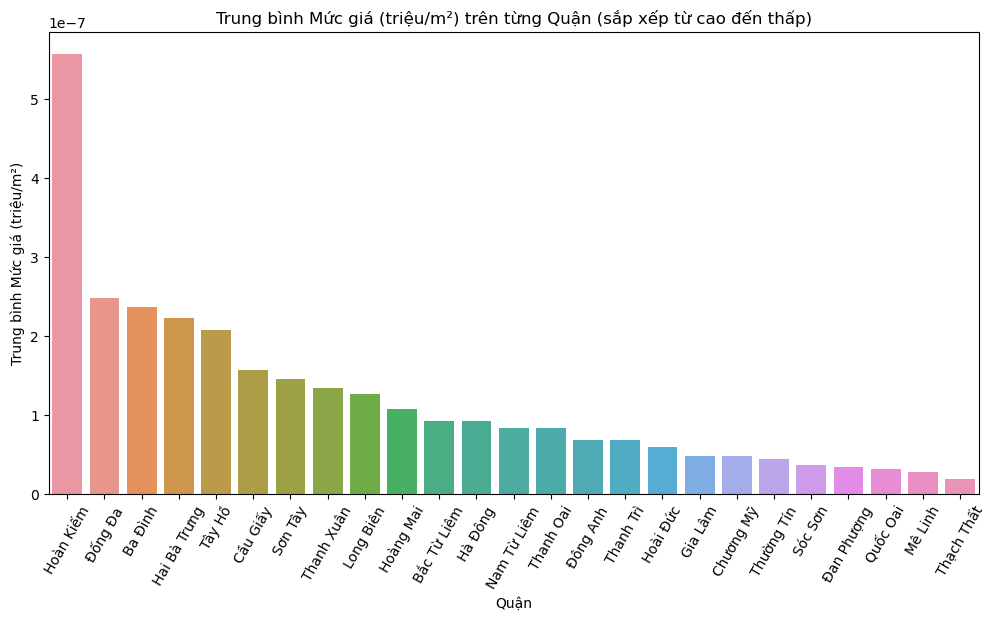

In [9]:
# Biểu đồ cột biểu thị sự tương quan giữa trung bình Mức giá (triệu/m²) với Quận

# Tính toán trung bình Mức giá (triệu/m²) trên từng Quận và sắp xếp từ cao đến thấp
avg_price_per_area = (df.groupby('Quận')['Mức giá (tỷ)'].mean() / df.groupby('Quận')['Diện tích (m²)'].mean() / 1000000).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_area.index, y=avg_price_per_area.values)
plt.title('Trung bình Mức giá (triệu/m²) trên từng Quận (sắp xếp từ cao đến thấp)')
plt.xticks(rotation=60)
plt.xlabel('Quận')
plt.ylabel('Trung bình Mức giá (triệu/m²)')
plt.show()

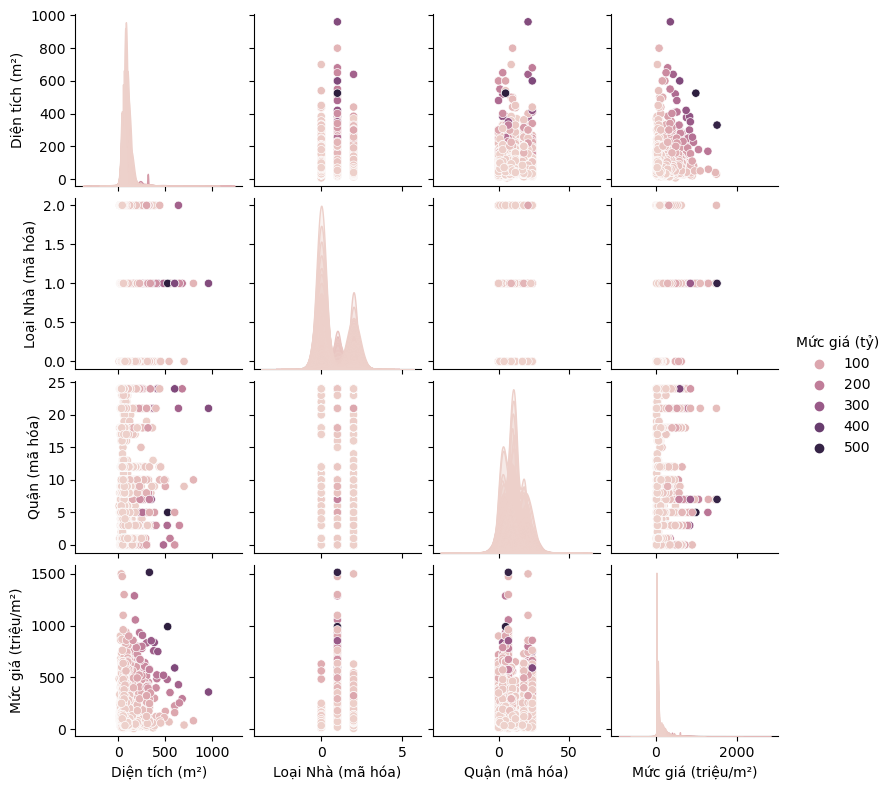

In [10]:
# Pairplot (Numerical columns)
dat = df.loc[:,["Diện tích (m²)", "Mức giá (tỷ)","Loại Nhà (mã hóa)","Quận (mã hóa)", "Mức giá (triệu/m²)"]]
sns.pairplot(dat, hue='Mức giá (tỷ)', height = 2)

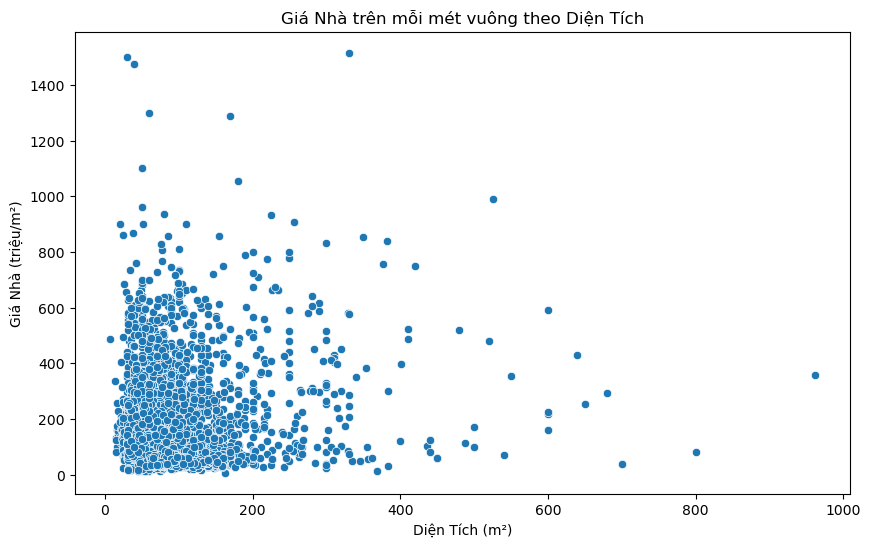

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diện tích (m²)', y='Mức giá (triệu/m²)', data=df)
plt.title('Giá Nhà trên mỗi mét vuông theo Diện Tích')
plt.xlabel('Diện Tích (m²)')
plt.ylabel('Giá Nhà (triệu/m²)')
plt.show()

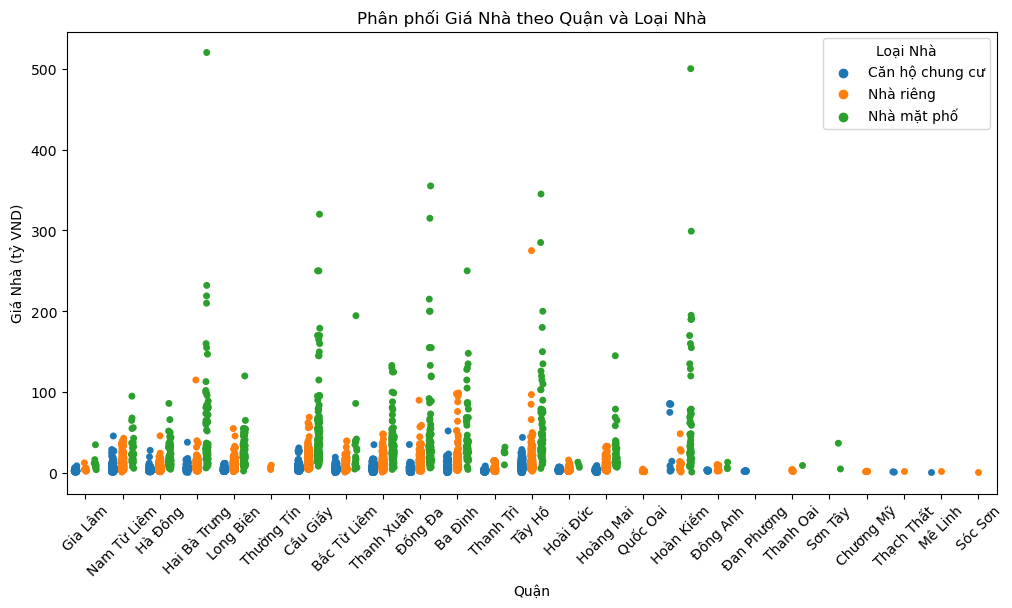

In [12]:
# Biểu đồ 8: Biểu đồ strip của giá nhà theo quận và loại nhà
plt.figure(figsize=(12, 6))
sns.stripplot(x='Quận', y='Mức giá (tỷ)', hue='Loại nhà', data=df, dodge=True)
plt.title('Phân phối Giá Nhà theo Quận và Loại Nhà')
plt.xlabel('Quận')
plt.ylabel('Giá Nhà (tỷ VND)')
plt.xticks(rotation=45)
plt.legend(title='Loại Nhà')
plt.show()

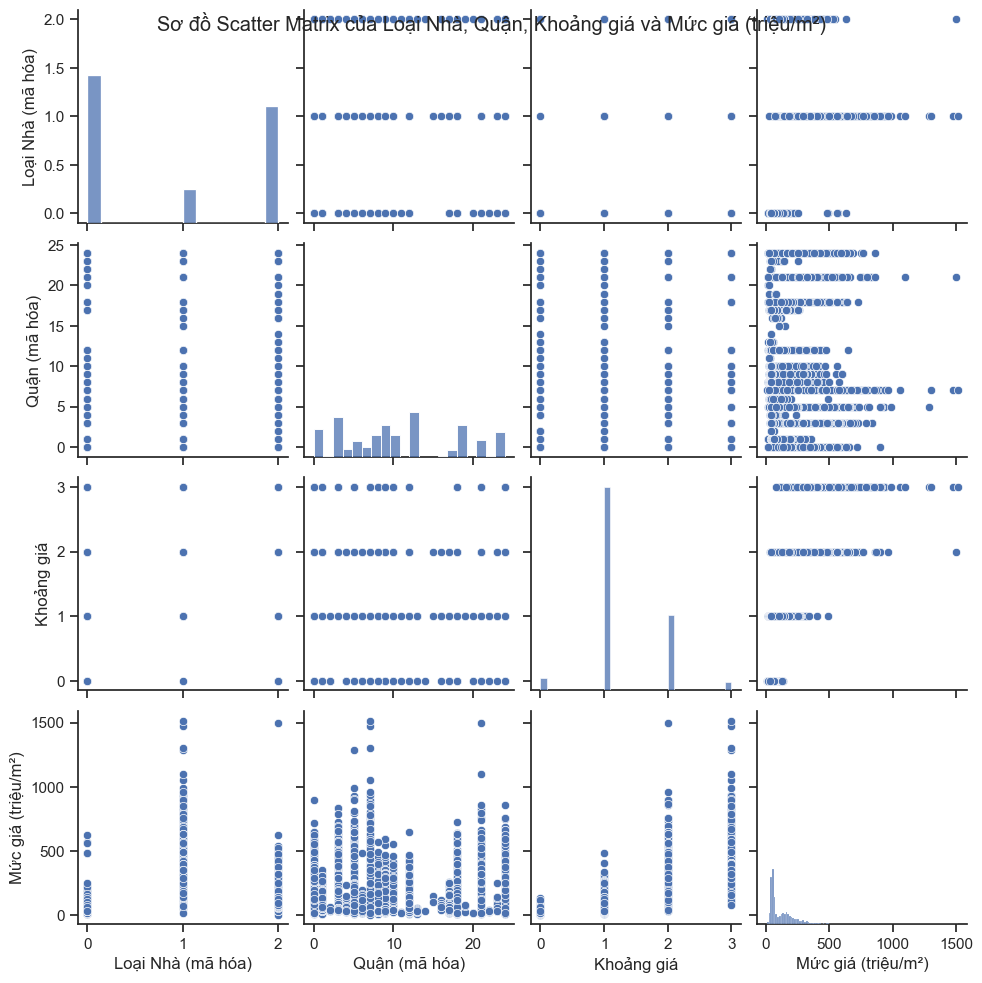

In [13]:
# Lọc ra các cột cần thiết
cols = ['Loại Nhà (mã hóa)', 'Quận (mã hóa)', 'Khoảng giá', 'Mức giá (triệu/m²)']
data_subset = df[cols]

# Vẽ sơ đồ scatter matrix
sns.set(style='ticks')
sns.pairplot(data_subset)
plt.suptitle('Sơ đồ Scatter Matrix của Loại Nhà, Quận, Khoảng giá và Mức giá (triệu/m²)')
plt.show()